In [7]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew
sns.set()
warnings.filterwarnings('ignore')

In [8]:
# Set the directory path where the CSV files are located
file1 = pd.read_csv("resale-flat-prices-based-on-approval-date-1990-1999.csv")
file2 = pd.read_csv("resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
file3 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
file4 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
file5 = pd.read_csv("resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")

In [9]:
df = pd.concat([file1, file2, file3, file4, file5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
826576,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
826577,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
826578,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
826579,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


# **Preprocessing**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                826581 non-null  object 
 1   town                 826581 non-null  object 
 2   flat_type            826581 non-null  object 
 3   block                826581 non-null  object 
 4   street_name          826581 non-null  object 
 5   storey_range         826581 non-null  object 
 6   floor_area_sqm       826581 non-null  float64
 7   flat_model           826581 non-null  object 
 8   lease_commence_date  826581 non-null  int64  
 9   resale_price         826581 non-null  float64
 10  remaining_lease      117527 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 69.4+ MB


In [11]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709054
dtype: int64

In [12]:
df.nunique()

month                   369
town                     27
flat_type                 8
block                  2454
street_name             568
storey_range             25
floor_area_sqm          209
flat_model               33
lease_commence_date      54
resale_price           8481
remaining_lease         673
dtype: int64

In [13]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [14]:
# Map flat type values to 'MULTI GENERATION' if it is 'MULTI-GENERATION' and update the 'flat_type' column in the dataframe.

flat_type_mappings ={Type : 'MULTI GENERATION' if Type == 'MULTI-GENERATION'  else Type  for Type in df['flat_type']}

df['flat_type'] = df['flat_type'].map(flat_type_mappings)
df['flat_type'].value_counts()

flat_type
4 ROOM              309314
3 ROOM              272580
5 ROOM              170408
EXECUTIVE            62641
2 ROOM                9863
1 ROOM                1273
MULTI GENERATION       502
Name: count, dtype: int64

In [15]:
df['flat_model'].nunique()

33

In [16]:
# Create a mapping to convert each flat model to its uppercase equivalent
flat_model_mappings = {model : model.upper()  for model in df['flat_model']}

df['flat_model'] = df['flat_model'].map(flat_model_mappings)

df['flat_model'].nunique()

20

In [17]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m').dt.to_period('M')

In [18]:
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [19]:
# Extract the minimum storey and maximum storey from 'storey_range' and convert it to integer

df['minimum_storey']=df['storey_range'].str.split(' TO ').str[0].astype(int)
df['maximum_storey']=df['storey_range'].str.split(' TO ').str[1].astype(int)
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN,1990,10,12
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN,1990,4,6
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN,1990,10,12
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN,1990,7,9
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN,1990,4,6


In [20]:
df['is_remaining_lease'] = np.where(df['remaining_lease'].isna()==True, 0, 1)

In [21]:
# Replace NaN values in 'remaining_lease' with 'Not Specified'
df['remaining_lease'] = np.where(df['remaining_lease'].isna()==True, 'Not Specified', df['remaining_lease'])

In [22]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
minimum_storey         0
maximum_storey         0
is_remaining_lease     0
dtype: int64

In [23]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12,0
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6,0
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12,0
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9,0
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,IMPROVED,1988,580000.0,Not Specified,2014,10,12,0
826577,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,MAISONETTE,1988,540000.0,Not Specified,2014,10,12,0
826578,12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,APARTMENT,1992,738000.0,Not Specified,2014,7,9,0
826579,12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,MAISONETTE,1985,592000.0,Not Specified,2014,7,9,0


# ***Skewness***

In [24]:
def skewness_plot(df, *column):
    nrow = len(column)
    plot_no=0
    for col_name in column:
        if  'sqrt' in col_name:
            title= "After Treatment"
        else:
            title = "Before Treatment"

        plt.figure(figsize=(16, 8))

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.boxplot(x=col_name, data=df)
        plt.title('Boxplot - '+ title)

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.distplot(df[col_name])
        plt.title(f'Distplot - Skewness: {skew(df[col_name])}')

        plot_no+=1
        plt.subplot(nrow, 3, plot_no)
        sns.violinplot(x=col_name, data=df)
        plt.title('Violinplot - ' + title)

    plt.tight_layout()
    
    return plt.show()

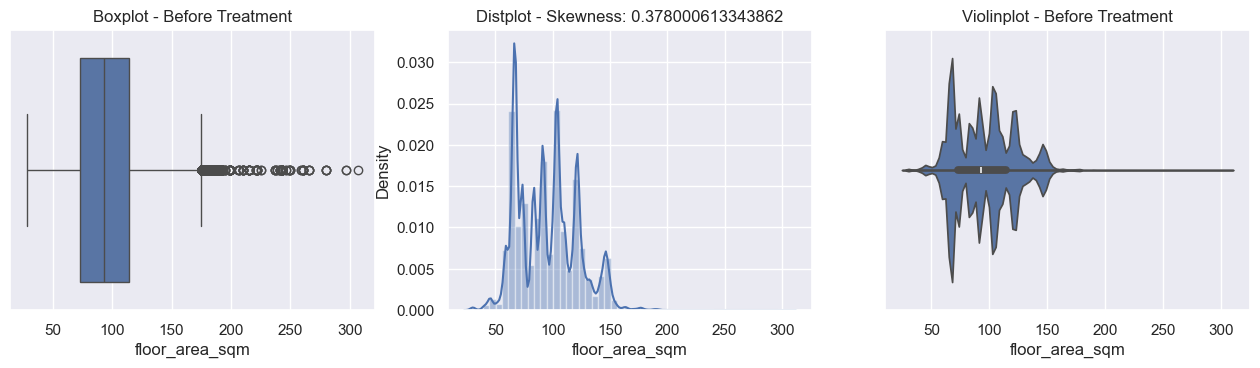

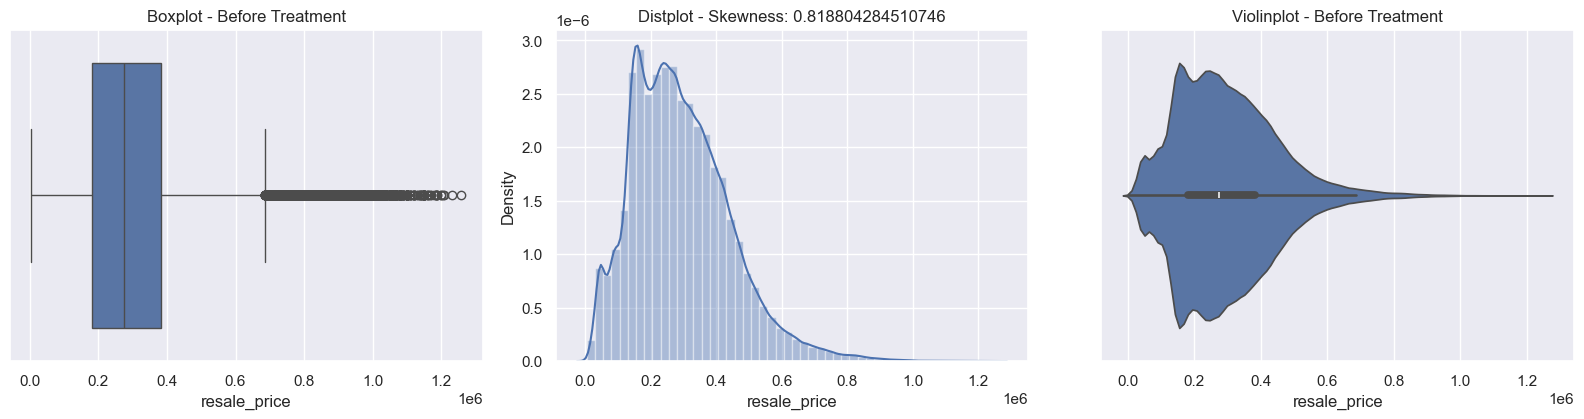

In [25]:
numerical_columns = ['floor_area_sqm', 'resale_price']
skewness_plot(df, *numerical_columns)

In [26]:
def Square_Root_Transformation(df, *column):

    for col_name in column:
        # Square Root Tansformation
        df[col_name+'_sqrt'] = np.sqrt(df[col_name])
        

    column =[i for i in df.columns if 'sqrt' in i]

    return skewness_plot(df, * column)

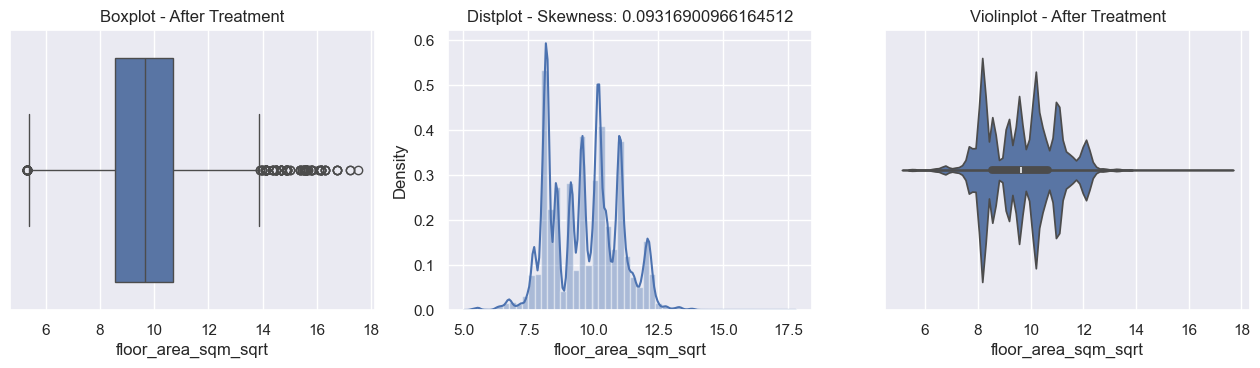

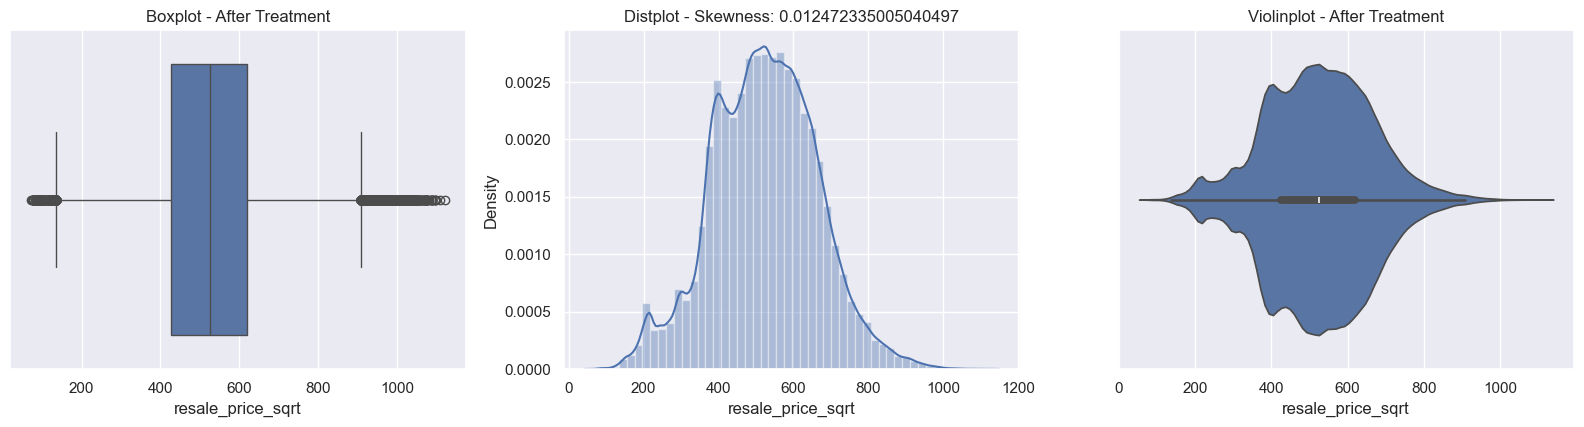

In [27]:
Square_Root_Transformation(df, *numerical_columns)

<Axes: >

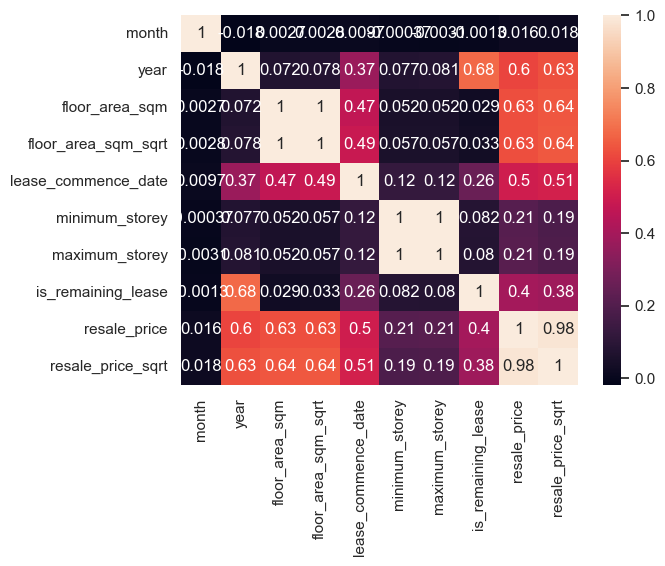

In [28]:
# Generate a heatmap to visualize the correlation matrix for the specified columns
column_name = ['month', 'year', 'floor_area_sqm', 'floor_area_sqm_sqrt', 'lease_commence_date', 'minimum_storey','maximum_storey',
               'is_remaining_lease', 'resale_price', 'resale_price_sqrt']
sns.heatmap(df[column_name].corr(), annot= True)

# ***Outlier***

In [29]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease,floor_area_sqm_sqrt,resale_price_sqrt
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12,0,5.567764,94.868330
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6,0,5.567764,77.459667
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12,0,5.567764,89.442719
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9,0,5.567764,77.459667
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6,0,8.544004,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,IMPROVED,1988,580000.0,Not Specified,2014,10,12,0,11.045361,761.577311
826577,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,MAISONETTE,1988,540000.0,Not Specified,2014,10,12,0,12.083046,734.846923
826578,12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,APARTMENT,1992,738000.0,Not Specified,2014,7,9,0,12.806248,859.069264
826579,12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,MAISONETTE,1985,592000.0,Not Specified,2014,7,9,0,12.328828,769.415362


In [30]:

def outlier_plot(df):

    plt.figure(figsize=(16, 10))

    plt.subplot(2, 2, 1)
    sns.boxplot(x='floor_area_sqm', data=df)
    plt.title('Boxplot - floor area sqm')

    plt.subplot(2, 2, 2)
    sns.boxplot(x='floor_area_sqm_sqrt', data=df)
    plt.title('Boxplot - floor area sqm sqrt')

    plt.subplot(2, 2, 3)
    sns.boxplot(x='resale_price', data=df)
    plt.title('Boxplot - '+ 'resale price')

    plt.subplot(2, 2, 4)
    sns.boxplot(x='resale_price_sqrt', data=df)
    plt.title('Boxplot - '+ 'resale price sqrt')
    plt.tight_layout()
    
    return plt.show()

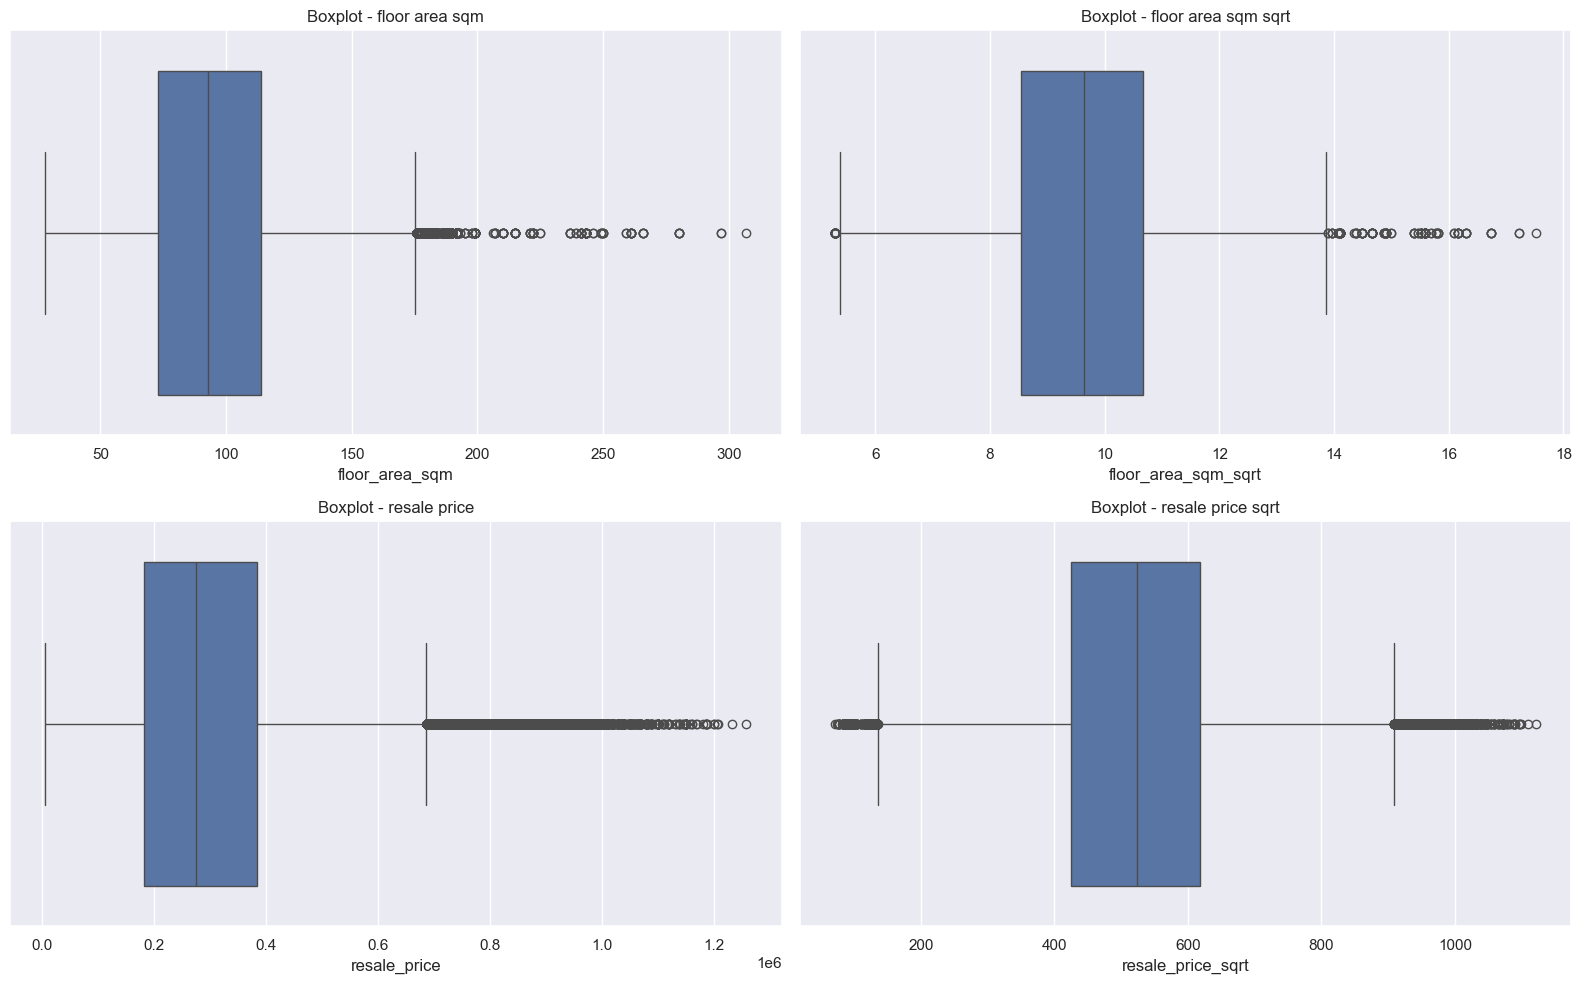

In [31]:
outlier_plot(df)

In [32]:
# Identify and handle outliers in specified numerical columns using the quantile-based method.

def outlier_quantile(df, *column):

    for col_name in column:
        #Finding the IQR
        percentile25 = df[col_name].quantile(0.25)
        percentile75 = df[col_name].quantile(0.75)
        iqr = percentile75 - percentile25

        # Define upper and lower limits for outlier detection
        upper_limit = percentile75 + 1.5 * iqr
        lower_limit = percentile25 - 1.5 * iqr

        # Cap values beyond upper and lower limits
        df[col_name] = np.where(df[col_name] > upper_limit, upper_limit, df[col_name])
        df[col_name] = np.where(df[col_name] < lower_limit, lower_limit, df[col_name])

    return outlier_plot(df)

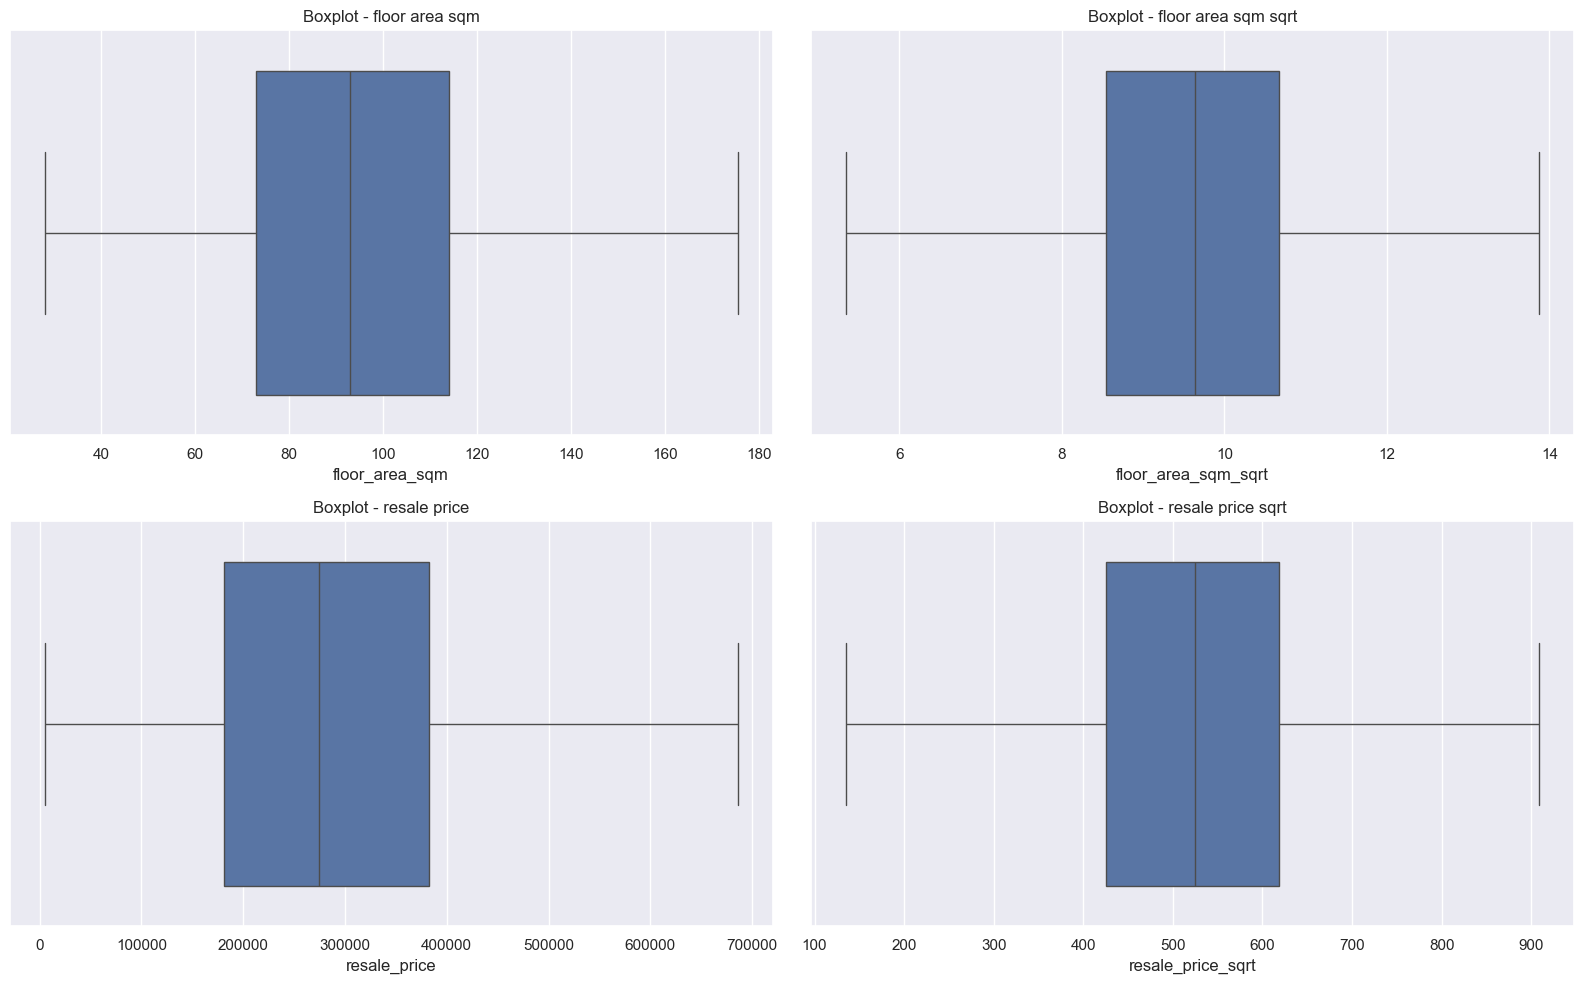

In [33]:
column_name = [ 'floor_area_sqm', 'floor_area_sqm_sqrt', 'resale_price', 'resale_price_sqrt']
outlier_quantile(df, *column_name)

<Axes: >

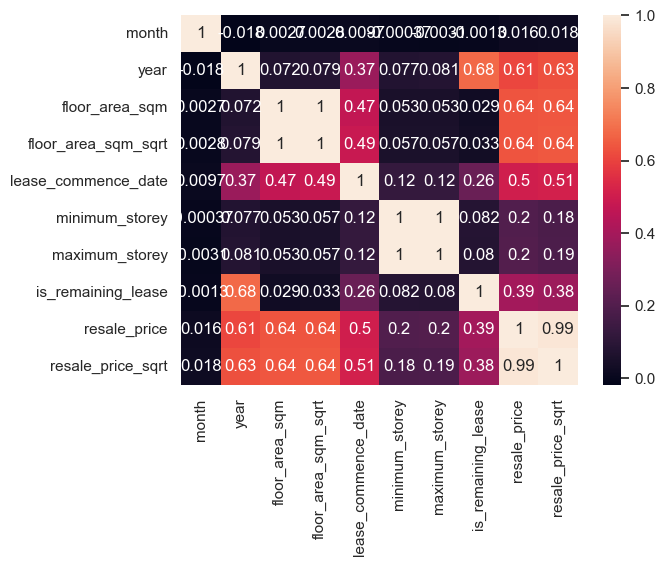

In [34]:
column_name = ['month', 'year', 'floor_area_sqm', 'floor_area_sqm_sqrt', 'lease_commence_date', 'minimum_storey','maximum_storey',
               'is_remaining_lease', 'resale_price', 'resale_price_sqrt']
sns.heatmap(df[column_name].corr(), annot= True)

# ***Regression***

In [35]:
df1 = df.copy()
df1['remaining_lease'] = df1['remaining_lease'].astype(str)
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year,minimum_storey,maximum_storey,is_remaining_lease,floor_area_sqm_sqrt,resale_price_sqrt
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,Not Specified,1990,10,12,0,5.567764,135.297463
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,Not Specified,1990,4,6,0,5.567764,135.297463
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,Not Specified,1990,10,12,0,5.567764,135.297463
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,Not Specified,1990,7,9,0,5.567764,135.297463
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,Not Specified,1990,4,6,0,8.544004,217.255610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826576,12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,IMPROVED,1988,580000.0,Not Specified,2014,10,12,0,11.045361,761.577311
826577,12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,MAISONETTE,1988,540000.0,Not Specified,2014,10,12,0,12.083046,734.846923
826578,12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,APARTMENT,1992,686000.0,Not Specified,2014,7,9,0,12.806248,859.069264
826579,12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,MAISONETTE,1985,592000.0,Not Specified,2014,7,9,0,12.328828,769.415362


In [36]:
df1.dtypes

month                    int64
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
year                     int64
minimum_storey           int32
maximum_storey           int32
is_remaining_lease       int32
floor_area_sqm_sqrt    float64
resale_price_sqrt      float64
dtype: object

In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

# Specify categorical column names for ordinal encoding
column_names = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model', 'remaining_lease']

# Dictionary to store unique values before and after ordinal encoding
unique_value ={}
for col_name in column_names:
    data = df1[col_name].unique()
    data.sort()

    df1[col_name] = enc.fit_transform(df1[[col_name]])

    globals()[col_name] = {}
    for i in df1[col_name].unique():
        globals()[col_name][data[int(i)]] = i
        unique_value[f'{col_name}'] = globals()[col_name]
    # print(globals()[col_name])
unique_value

{'town': {'ANG MO KIO': 0.0,
  'BEDOK': 1.0,
  'BISHAN': 2.0,
  'BUKIT BATOK': 3.0,
  'BUKIT MERAH': 4.0,
  'BUKIT TIMAH': 6.0,
  'CENTRAL AREA': 7.0,
  'CHOA CHU KANG': 8.0,
  'CLEMENTI': 9.0,
  'GEYLANG': 10.0,
  'HOUGANG': 11.0,
  'JURONG EAST': 12.0,
  'JURONG WEST': 13.0,
  'KALLANG/WHAMPOA': 14.0,
  'MARINE PARADE': 16.0,
  'QUEENSTOWN': 19.0,
  'SENGKANG': 21.0,
  'SERANGOON': 22.0,
  'TAMPINES': 23.0,
  'TOA PAYOH': 24.0,
  'WOODLANDS': 25.0,
  'YISHUN': 26.0,
  'LIM CHU KANG': 15.0,
  'SEMBAWANG': 20.0,
  'BUKIT PANJANG': 5.0,
  'PASIR RIS': 17.0,
  'PUNGGOL': 18.0},
 'flat_type': {'1 ROOM': 0.0,
  '3 ROOM': 2.0,
  '4 ROOM': 3.0,
  '5 ROOM': 4.0,
  '2 ROOM': 1.0,
  'EXECUTIVE': 5.0,
  'MULTI GENERATION': 6.0},
 'block': {'309': 771.0,
  '216': 419.0,
  '211': 403.0,
  '202': 361.0,
  '235': 483.0,
  '232': 478.0,
  '308': 767.0,
  '220': 429.0,
  '219': 423.0,
  '247': 499.0,
  '320': 824.0,
  '252': 509.0,
  '223': 438.0,
  '230': 468.0,
  '329': 860.0,
  '313': 791.0,
  '117

In [38]:
import json
# Write the unique_value dictionary to a JSON file with proper indentation
with open('Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_value, file , indent = 4)

In [39]:
df1.dtypes

month                    int64
town                   float64
flat_type              float64
block                  float64
street_name            float64
storey_range           float64
floor_area_sqm         float64
flat_model             float64
lease_commence_date      int64
resale_price           float64
remaining_lease        float64
year                     int64
minimum_storey           int32
maximum_storey           int32
is_remaining_lease       int32
floor_area_sqm_sqrt    float64
resale_price_sqrt      float64
dtype: object

In [40]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [41]:
class regression:

    def __init__(self, x, y):
        # List of regression models to be evaluated
        self.models =[('AdaBoostRegressor', AdaBoostRegressor()),
                    #  ('RandomForestRegressor', RandomForestRegressor()),
                    #  ('ExtraTreesRegressor', ExtraTreesRegressor()),
                     ('GradientBoostingRegressor', GradientBoostingRegressor()),
                     ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
                     ('DecisionTreeRegressor', DecisionTreeRegressor()),
                     ('XGBRegressor', XGBRegressor()),
                     ('LinearRegression', LinearRegression()),
                     ('KNeighborsRegressor', KNeighborsRegressor()),
                     ('MLPRegressor', MLPRegressor()),
                     ]
        # Split the data into training and testing sets
        self.x_train, self.x_test, self.y_train,self.y_test = train_test_split(x,y,test_size=0.2, random_state = 42)
    
    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)
            
            data ={'Model_Name': model_name,
                    'Train_Mean_Square_Error': round(mean_squared_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Square_Error': round(mean_squared_error(self.y_test, y_test_pred),4),
                    'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred),4),
                    'Train_R2_Score': round(r2_score(self.y_train, y_train_pred ),4),
                    'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4)}
            result.append(data)
            
        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

In [42]:
y = df1['resale_price_sqrt']
x = df1.drop(['resale_price_sqrt', 'resale_price'], axis =1)

In [43]:
# Create an instance of the 'regression' class with input features 'x' and target variable 'y'
regression_models = regression(x,y)
# Apply the 'all_model' method to train and evaluate various regression models
r_models = regression_models.all_model()
r_models

(661264, 15) (165317, 15) (661264,) (165317,)


,Model_Name,Train_Mean_Square_Error,Test_Mean_Square_Error,Train_Mean_Absolute_Error,Test_Mean_Absolute_Error,Train_R2_Score,Test_R2_Score
0,AdaBoostRegressor,3336.5285,3334.4351,46.3820,46.2942,0.8271,0.8259
1,GradientBoostingRegressor,1279.0157,1270.9058,26.5150,26.4267,0.9337,0.9336
2,HistGradientBoostingRegressor,576.5796,578.9776,17.9324,17.9375,0.9701,0.9698
3,DecisionTreeRegressor,4.4487,580.9982,0.3428,16.9768,0.9998,0.9697
4,XGBRegressor,374.0422,385.6994,14.4819,14.6468,0.9806,0.9799
5,LinearRegression,4318.7106,4296.0657,51.7538,51.6582,0.7762,0.7757
6,KNeighborsRegressor,1222.0584,1923.5204,24.4518,30.8269,0.9367,0.8996
7,MLPRegressor,3980.1884,3956.1389,48.8839,48.6919,0.7938,0.7934


**Lowest Test MSE and MAE:**

- DecisionTreeRegressor has the lowest test MSE and MAE, suggesting good performance in terms of minimizing prediction errors.

**High R-squared (R2) Score:**

- Models like GradientBoostingRegressor, HistGradientBoostingRegressor, and XGBRegressor have high R2 scores, indicating a good ability to explain the variance in the resale prices.
    
- Among GradientBoostingRegressor, HistGradientBoostingRegressor, and XGBRegressor, XGBRegressor is often considered the best choice due to its superior performance, efficiency, and flexibility in handling diverse datasets.

In [44]:
r_models['Train_Mean_Square_Error'] - r_models['Test_Mean_Square_Error'],

(0      2.0934
 1      8.1099
 2     -2.3980
 3   -576.5495
 4    -11.6572
 5     22.6449
 6   -701.4620
 7     24.0495
 dtype: float64,)

In [45]:
# Extract the training and testing sets from the instance for further analysis
x_train, x_test, y_train, y_test = regression_models.x_train, regression_models.x_test, regression_models.y_train, regression_models.y_test
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((661264, 15), (165317, 15), (661264,), (165317,))

In [46]:
# XGBRegressor 
model = XGBRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 374.0422, 'Test_Mean_Square_Error': 385.6994}


In [47]:
# Hyperparameter tuning for XGBRegressor

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200]
}

# Create the XGBRegressor
xgb_reg = XGBRegressor()

# Use GridSearchCV to perform the search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
best_params

Mean Squared Error on Test Set: 497.64822007970935


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [48]:
# XBGRegressore with Hyperparameter
xgb_model = XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 200)
xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.9740129320669854, 'Mean Absolute Error': 16.64162615467084, 'Mean Squared Error': 497.64822007970935, 'Root Mean Squared Error': 22.308030394450096}


In [49]:
# DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
data ={
        'Train_Mean_Square_Error': round(mean_squared_error(y_train, y_train_pred),4),
        'Test_Mean_Square_Error': round(mean_squared_error(y_test, y_test_pred),4)}
print(data)

{'Train_Mean_Square_Error': 4.4487, 'Test_Mean_Square_Error': 580.3993}


In [50]:
# Hyperparameter tuning
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Use GridSearchCV to perform the search
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)
grid_result = grid_search.fit(x_train, y_train)

# Get the best parameters and the best model
best_params = grid_result.best_params_
best_model = grid_result.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')
print(best_model, best_params)

Mean Squared Error on Test Set: 450.32505285238506
DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42) {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [51]:
# DecisionTreeRegressor with Hyperparameter
decision_tree_model = DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10,)
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae=mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

score ={'R2': r2,
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse}
print(score)

{'R2': 0.9764936002185635, 'Mean Absolute Error': 14.995725684385894, 'Mean Squared Error': 450.1438192976205, 'Root Mean Squared Error': 21.216593018145502}


In [52]:
# Resale Price Prediction
data = np.array([[11, 1.0,4.0, 286.0, 39, 4.0,110.0, 5.0, 2006.0, 719, 2009.0, 7.0, 9.0, 0.0, 10.488]])
data.shape
print('XGBRegressor -> Resale Price : $', xgb_model.predict(data)[0]**2)
print('DecisionTreeRegressor -> Resale Price : $', decision_tree_model.predict(data)[0]**2)

XGBRegressor -> Resale Price : $ 529249.3231427819
DecisionTreeRegressor -> Resale Price : $ 509293.8672366663


In [53]:
column_name = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date',
                'remaining_lease', 'year', 'minimum_storey', 'maximum_storey', 'is_remaining_lease', 'floor_area_sqm_sqrt', ]
test_data =df1.iloc[0: :50000][column_name].values
test_result = df1.iloc[0: :50000][['resale_price']]
dt_y=decision_tree_model.predict(test_data)**2
xgb_y = xgb_model.predict(test_data)**2



In [54]:
# Comparing Predicted DecisionTreeRegressor, XGBRegressor resale price with Actual resale price
pred =pd.DataFrame(zip(df1.iloc[0: :50000]['resale_price'], dt_y, xgb_y), columns= ['Actual_resale_price', 'DecisionTreeRegressor', 'XGBRegressor'])
pred['XGBRegressor_Difference'] = pred['XGBRegressor'] - pred['Actual_resale_price']
pred['DecisionTreeRegressor_Difference'] = pred['DecisionTreeRegressor'] - pred['Actual_resale_price']
pred

,Actual_resale_price,DecisionTreeRegressor,XGBRegressor,XGBRegressor_Difference,DecisionTreeRegressor_Difference
0,9000.0,18305.403360,19662.916016,10662.916016,9305.403360
1,77000.0,84475.940215,74825.875000,-2174.125000,7475.940215
2,388000.0,318223.018649,380669.875000,-7330.125000,-69776.981351
3,163000.0,155640.795477,148326.531250,-14673.468750,-7359.204523
4,197500.0,191937.820265,193275.078125,-4224.921875,-5562.179735
5,244000.0,241373.202232,249730.328125,5730.328125,-2626.797768
6,248000.0,252902.282371,247401.312500,-598.687500,4902.282371
7,282000.0,278988.373717,290243.156250,8243.156250,-3011.626283
8,251000.0,249967.306706,249753.484375,-1246.515625,-1032.693294
9,236000.0,240986.494025,233572.328125,-2427.671875,4986.494025


In [55]:
# With help of above dataframe DecisionTreeRegressor's predicted resale price is near to the Actual resale price. That's I am going to choose 'DecisionTreeRegressor' for resale price prediction
# Save the Decision Tree model to a file
import pickle

with open('Decision_Tree_Model.pkl', 'wb') as file:
    pickle.dump(decision_tree_model, file) 

In [56]:
# Load the Decision Tree model from the file
with open('Decision_Tree_Model.pkl', 'rb' ) as file:
    reg_model = pickle.load(file)

In [57]:
# Make a prediction using the loaded model
data = np.array([[11, 1.0,4.0, 286.0, 39, 4.0,110.0, 5.0, 2006.0, 719, 2009.0, 7.0, 9.0, 0.0, 10.488]])

print( 'Resale Price : $', reg_model.predict(data)[0]**2)

Resale Price : $ 509293.8672366663
